In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Membaca file dari Google Drive
df = pd.read_csv('/content/sample_data/Walmart Data Analysis and Forcasting.csv')

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


##DATA UNDERSTANDING##

In [4]:
# Fungsi untuk menghitung persentase missing values
def missing_values_percentage(df):
    missing_values = df.isnull().sum()
    total_values = len(df)
    missing_percentage = (missing_values / total_values) * 100
    return pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Menghitung dan menampilkan persentase missing values untuk setiap DataFrame
missing_info_combined = missing_values_percentage(df)

print("Missing Values Info for df1:")
print(missing_info_combined)

Missing Values Info for df1:
              Missing Values  Percentage
Store                      0         0.0
Date                       0         0.0
Weekly_Sales               0         0.0
Holiday_Flag               0         0.0
Temperature                0         0.0
Fuel_Price                 0         0.0
CPI                        0         0.0
Unemployment               0         0.0


In [5]:
#duplicate checking
df.duplicated().sum()

0

In [6]:
jumlah_data = len(df)
print(f"Jumlah total data dalam df adalah: {jumlah_data}")

Jumlah total data dalam df adalah: 6435


##DATA PREPROCESSING##

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


##EDA##

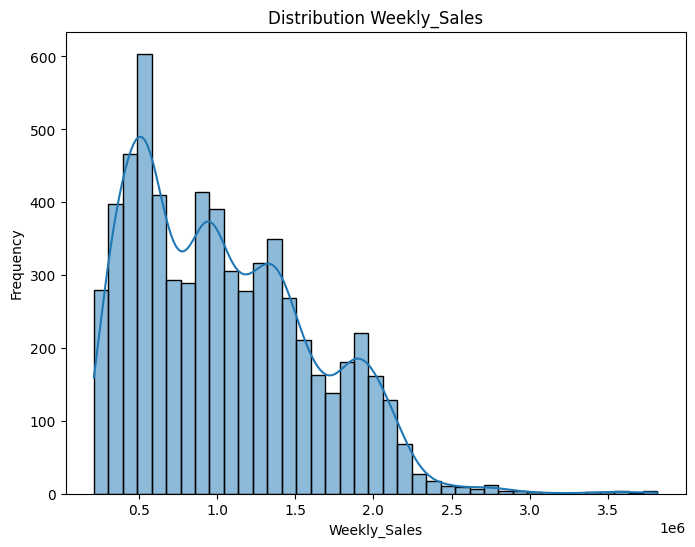

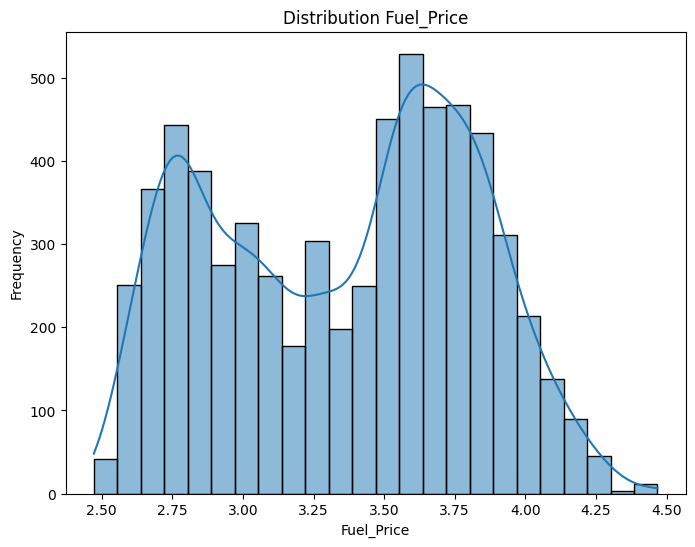

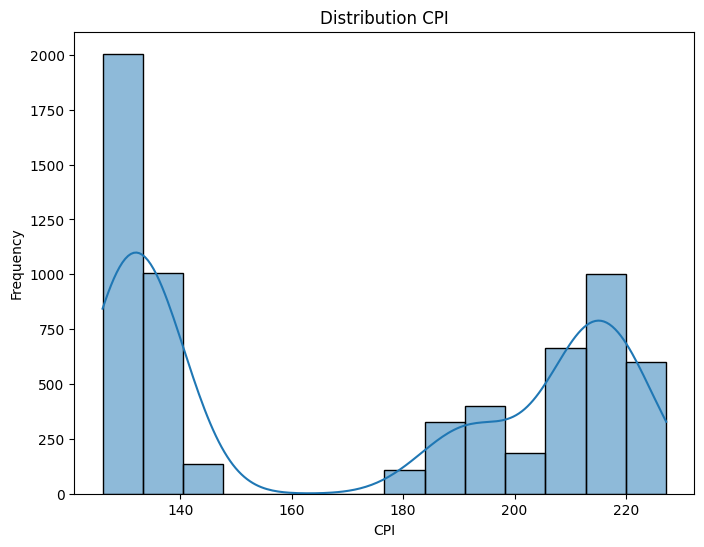

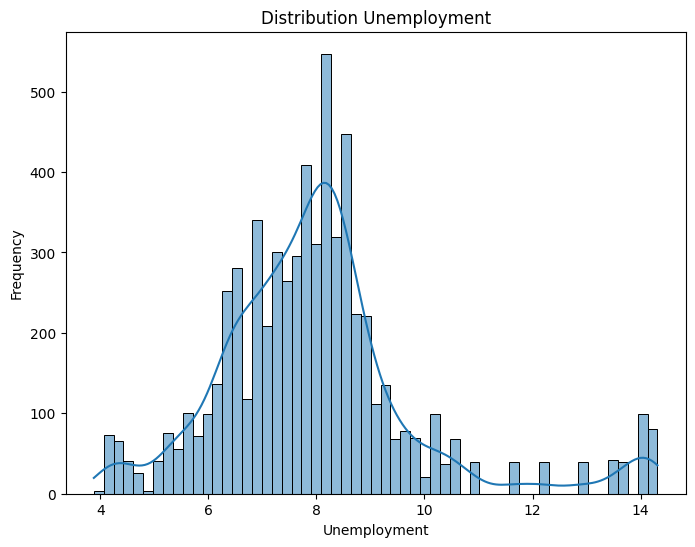

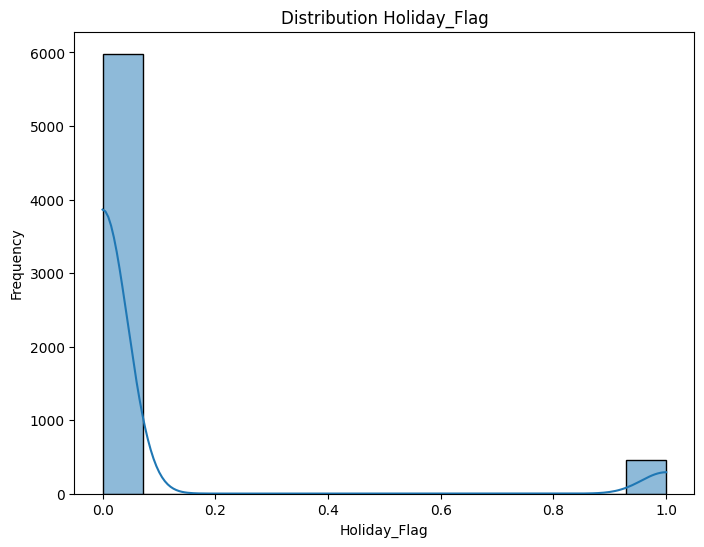

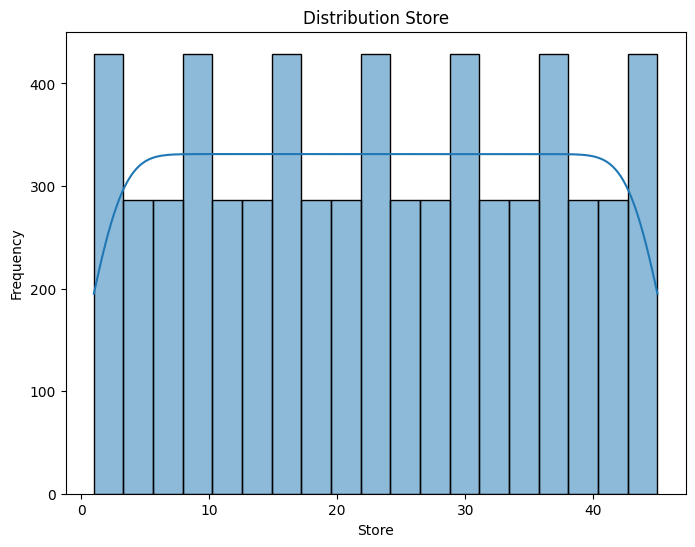

In [9]:
numerical_cols = ['Weekly_Sales','Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'Store']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Weekly_Sales Distribution
- The data in Weekly_Sales has a fairly wide distribution, ranging from relatively low to high values.
- The highest frequency of weekly sales occurs at peaks, especially at values around 500,000.

Fuel_Price Distribution
- Fuel_Price data has a range of values from 2.5 to 4.5, indicating that there is variation in fuel prices.
- There are two peaks, the first at 2.7-2.8 and the second at 3.6-3.7. These two peaks indicate that these prices are the most frequently recorded prices in the dataset.

CPI distribution
- there are two peaks, the first peak lies at a very high value of 130-135, the second peak lies at a value of 215-220. Indirectly, these CPI values indicate two significantly different time periods in the dataset.
- The 130-135 CPI values have a relatively narrow spread, while the 215-220 CPI values have a moderate spread.

Unemployment Distribution
- The highest frequency occurs at 8%.
- In this case, it can be correlated with other variables such as weekly_sales and CPI.
The significant fluctuations during the data period at 4% and 14-15% should be noted as potential periods with very different labor market conditions.

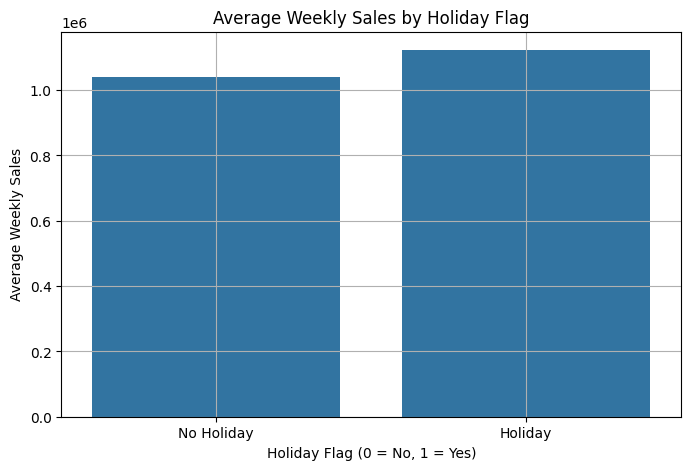

In [10]:
# Calculate average Weekly Sales by Holiday Flag
average_sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=average_sales_by_holiday.index, y=average_sales_by_holiday.values)
plt.title('Average Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag (0 = No, 1 = Yes)')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.grid()
plt.show()

Analysis of average weekly sales based on holiday indicators shows that there is an increase in sales on weeks that include holidays.

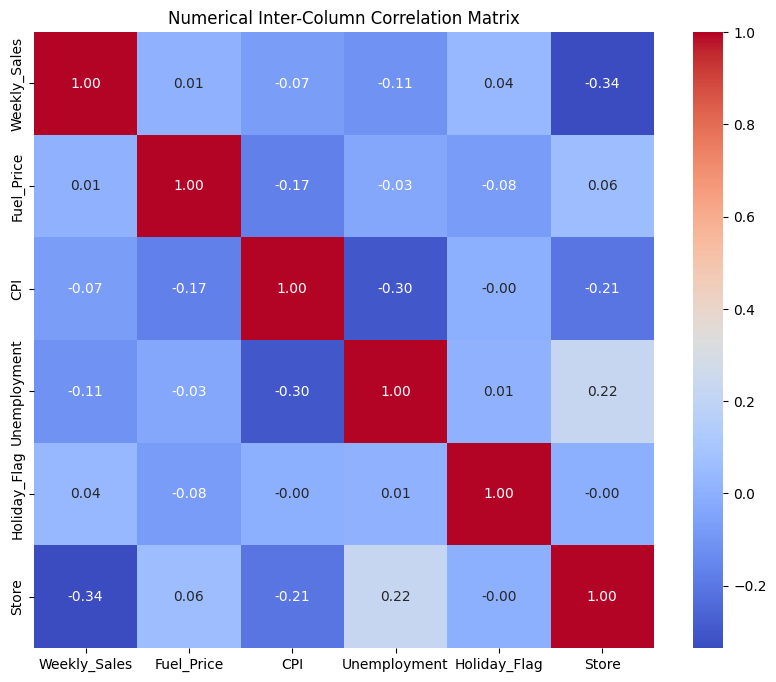

In [11]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Inter-Column Correlation Matrix')
plt.show()

##INSIGHT##

- Numerical variables such as Fuel_Price, CPI, and Holiday_Flag show very weak correlations with Weekly_Sales, so they are unlikely to be the main drivers of variations in weekly sales.
- Store shows a moderate negative correlation with Weekly_Sales, indicating that store identity has a considerable influence on weekly sales levels.

In [12]:
# Ekstrak fitur Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [13]:
#
features = ['Store', 'Year', 'Month', 'Day', 'Weekday', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

In [26]:
# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Mengatur 'Date' sebagai index
df.set_index('Date', inplace=True)

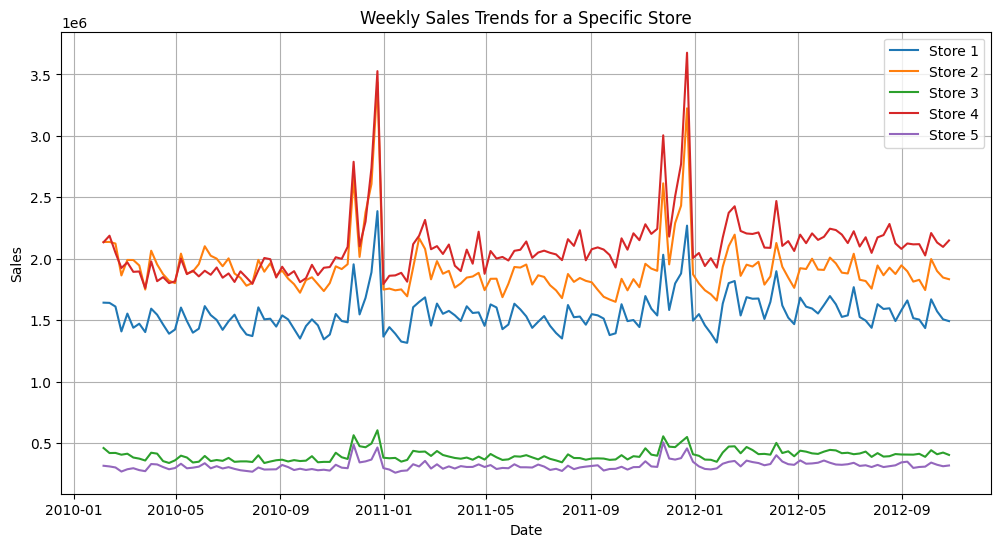

In [28]:
toko_yang_dipilih = [1, 2, 3, 4, 5]
if 'Store' in df.columns:
    plt.figure(figsize=(12, 6))
    for store in toko_yang_dipilih:
        if store in df['Store'].unique():
            store_data = df[df['Store'] == store].sort_index()
            plt.plot(store_data['Weekly_Sales'], label=f'Store {store}')
        else:
            print(f"Toko dengan nomor {store} tidak ditemukan.")
    plt.title('Weekly Sales Trends for a Specific Store')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'Store' tidak ditemukan dalam DataFrame.")

There is a significant difference in weekly sales levels between the five stores featured.
Sales at each store are strongly influenced by external factors

In [29]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [30]:
# Menghitung moving average untuk tren yang lebih halus
weekly_sales['Moving_Average'] = weekly_sales['Weekly_Sales'].rolling(window=4).mean()

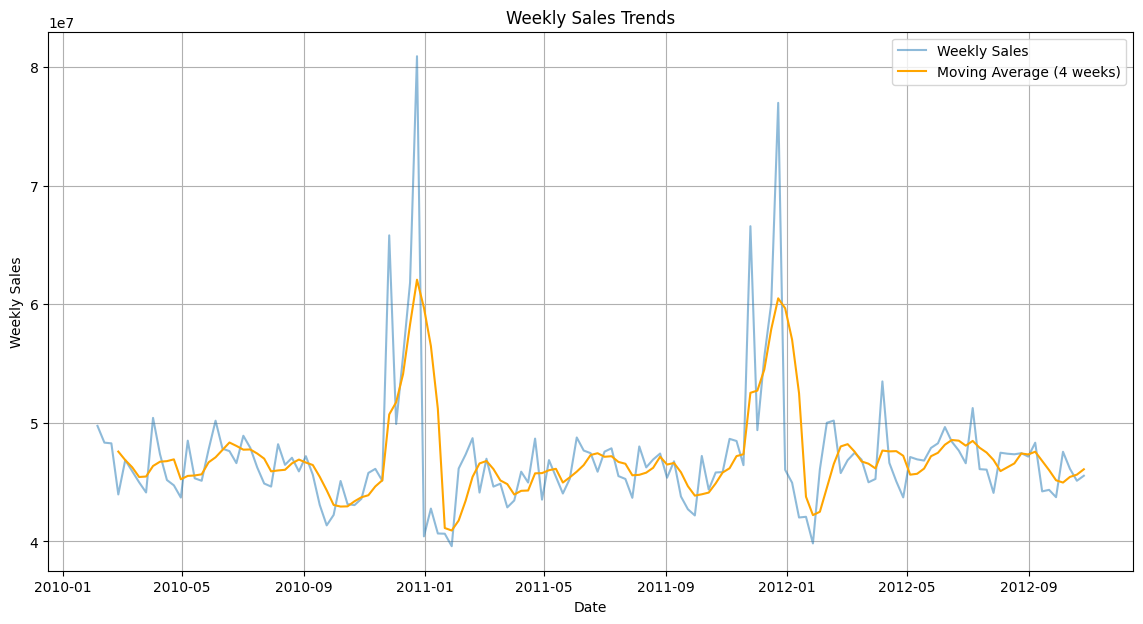

In [31]:
# Visualisasi
plt.figure(figsize=(14, 7))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Weekly Sales', alpha=0.5)
plt.plot(weekly_sales['Date'], weekly_sales['Moving_Average'], label='Moving Average (4 weeks)', color='orange')
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

There's a clear seasonal pattern in the weekly sales. Notice the significant peaks occurring roughly around the end of the year (late November/December) in both 2010 and 2011. This suggests a strong positive impact of holiday shopping or end-of-year promotions on sales.

In [14]:
# Create a new DataFrame to aggregate monthly sales
monthly_sales = df.groupby(['Year', 'Month'], as_index=False)['Weekly_Sales'].sum()

In [15]:
# Membagi data menjadi train dan test
train_data = df.sample(frac=0.8, random_state=42)  # 80% untuk training
test_data = df.drop(train_data.index)  # 20% untuk testing

<BarContainer object of 33 artists>

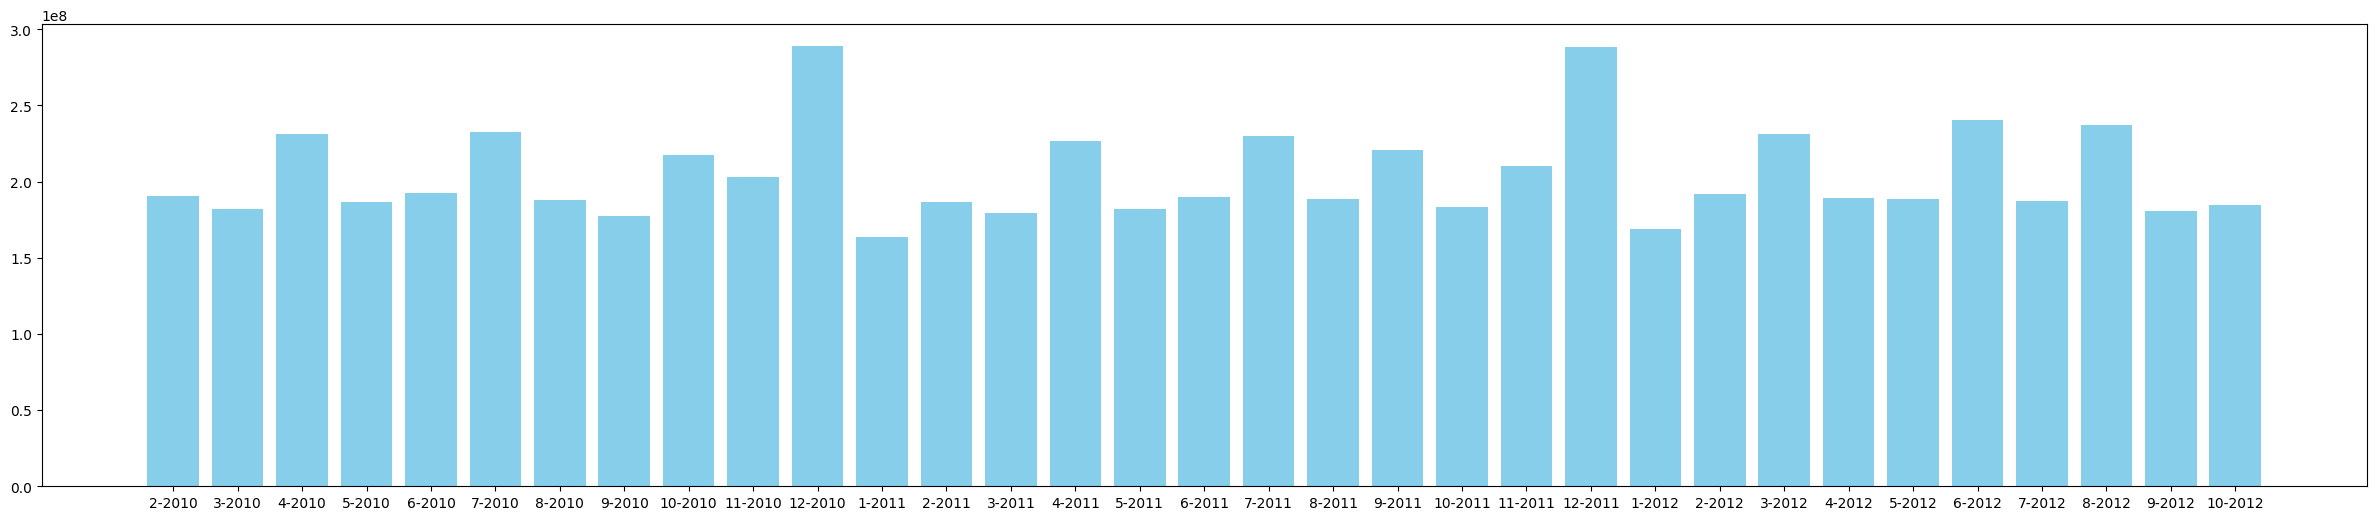

In [16]:
# diagram batang untuk menampilkan total penjualan bulanan
plt.figure(figsize=(30, 6))
plt.bar(monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str),
        monthly_sales[target], color='skyblue')

In [17]:
# Create actual_sales DataFrame
actual_sales = df[['Date', 'Weekly_Sales']].copy()
actual_sales.rename(columns={'Weekly_Sales': 'Actual'}, inplace=True)

In [18]:
# Create predicted_sales DataFrame
predicted_sales = df[['Date']].copy()
predicted_sales['Predicted'] = actual_sales['Actual'] * (0.8 + np.random.rand(len(df)) * 0.4)

In [19]:
# Menggabungkan data aktual dan prediksi
merged_data = pd.merge(actual_sales, predicted_sales, on='Date', how='outer')

In [20]:
# Ekstraksi tahun dan bulan
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month

In [21]:
# Buat kolom 'Month-Year' untuk pengelompokan
merged_data['Month-Year'] = merged_data['Date'].dt.to_period('M')

In [22]:
# Group the predicted_sales by Date
predicted_sales_grouped = predicted_sales.groupby('Date')['Predicted'].sum().reset_index()

In [23]:
# Menampilkan hasil prediksi
print(predicted_sales)

           Date     Predicted
0    2010-02-05  1.594061e+06
1    2010-02-12  1.851006e+06
2    2010-02-19  1.498526e+06
3    2010-02-26  1.178972e+06
4    2010-03-05  1.847950e+06
...         ...           ...
6430 2012-09-28  5.722572e+05
6431 2012-10-05  7.910258e+05
6432 2012-10-12  6.571766e+05
6433 2012-10-19  6.550426e+05
6434 2012-10-26  7.613523e+05

[6435 rows x 2 columns]


In [24]:
# Kelompokkan data berdasarkan 'Month-Year'
grouped_data = merged_data.groupby('Month-Year').agg({'Actual': 'sum', 'Predicted': 'sum'}).reset_index()

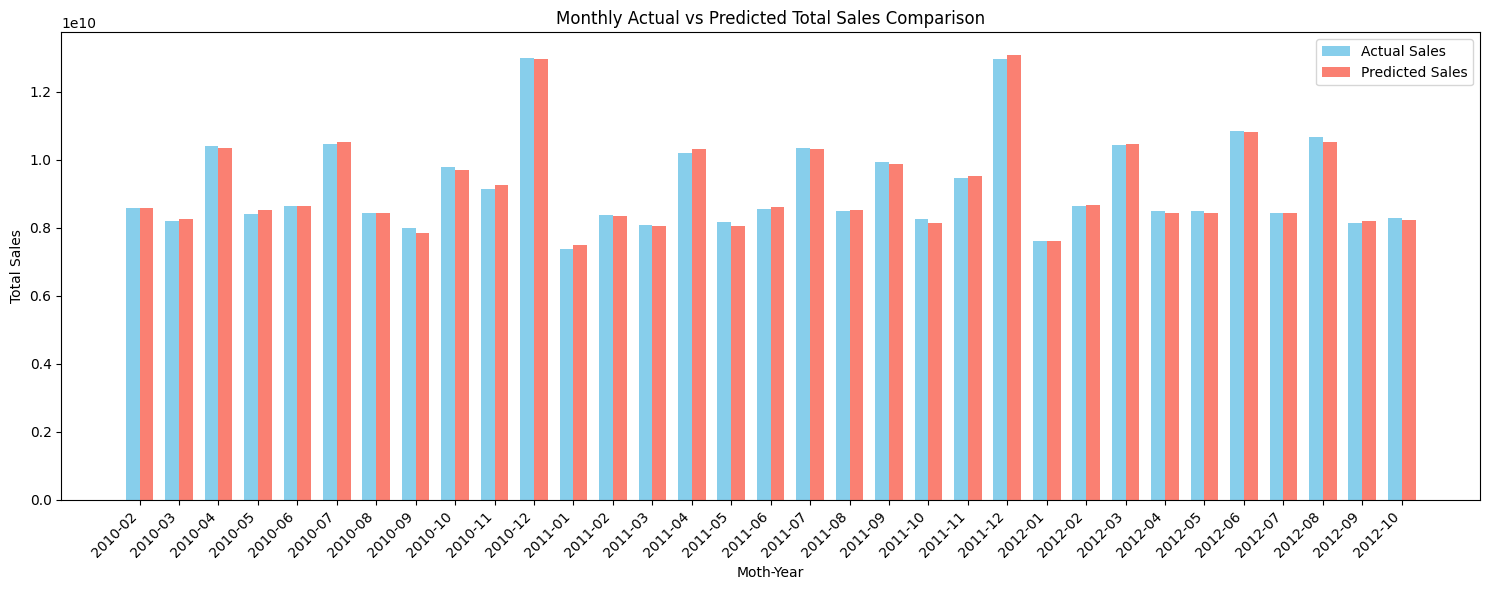

In [25]:
# Membuat diagram batang
plt.figure(figsize=(15, 6))
bar_width = 0.35
index = np.arange(len(grouped_data['Month-Year']))

bar1 = plt.bar(index, grouped_data['Actual'], bar_width, label='Actual Sales', color='skyblue')
bar2 = plt.bar(index + bar_width, grouped_data['Predicted'], bar_width, label='Predicted Sales', color='salmon')
plt.xlabel('Moth-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Actual vs Predicted Total Sales Comparison')
plt.xticks(index + bar_width / 2, grouped_data['Month-Year'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

There is little difference between predicted and actual sales
In some months, there is a clear difference between actual and predicted total sales. This illustrates the presence of external or internal factors that may not be captured in the prediction model, which could also be changes in consumer behavior or disruptions in supply.

In [27]:
print(df.head())

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Year  Month  Day  Weekday  
Date                                                             
2010-02-05  211.096358         8.106  2010      2    5        4  
2010-02-12  211.242170         8.106  2010      2   12        4  
2010-02-19  211.289143         8.106  2010      2   19        4  
2010-02-26  211.319643         8.106  2010      2   26        4  
2010-03-05  211.350143         8.106  2010      3    5        4  


##MACHINE LEARNING##

In [32]:
pip install autogluon

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [34]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [35]:
# Initialize and train the AutoGluon predictor
predictor = TabularPredictor(label=target).fit(train_data)

# Make predictions on the test set
predictions = predictor.predict(test_data)

# Evaluate the model
performance = predictor.evaluate(test_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250428_034322"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.40 GB / 12.67 GB (90.0%)
Disk Space Avail:   62.19 GB / 107.72 GB (57.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 125984
[2000]	valid_set's rmse: 104069
[3000]	valid_set's rmse: 98830.9
[4000]	valid_set's rmse: 97132.9
[5000]	valid_set's rmse: 96595
[6000]	valid_set's rmse: 96245.5
[7000]	valid_set's rmse: 96341.2
[8000]	valid_set's rmse: 96298.5


	-96072.3943	 = Validation score   (-root_mean_squared_error)
	16.87s	 = Training   runtime
	0.59s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 84367
[2000]	valid_set's rmse: 83533.3


	-83439.6548	 = Validation score   (-root_mean_squared_error)
	2.82s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-136202.0739	 = Validation score   (-root_mean_squared_error)
	8.99s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-74987.4899	 = Validation score   (-root_mean_squared_error)
	124.31s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-137147.2727	 = Validation score   (-root_mean_squared_error)
	2.91s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-309447.2174	 = Validation score   (-root_mean_squared_error)
	7.64s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-79315.266	 = Validation score   (-root_mean_squared_error)
	1.89s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-101735.0633	 = Validation score   (-root_mean_squared_error)
	258.33s	 = Training 

[1000]	valid_set's rmse: 97200.9
[2000]	valid_set's rmse: 96993


	-96986.6621	 = Validation score   (-root_mean_squared_error)
	9.19s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.68, 'XGBoost': 0.24, 'NeuralNetTorch': 0.08}
	-74015.9552	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 447.94s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 12049.8 rows/s (515 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250428_034322")


In [37]:
print(performance)

{'root_mean_squared_error': -66420.49509406292, 'mean_squared_error': -4411682168.540437, 'mean_absolute_error': -40742.462632575756, 'r2': 0.9864126703804796, 'pearsonr': 0.9932250749689345, 'median_absolute_error': -26008.092500000028}


In [52]:
performance = {
    'root_mean_squared_error': abs(-66420.49509406292),
    'mean_squared_error': abs(-4411682168.540437),
    'mean_absolute_error': abs(-40742.462632575756),
    'r2': 0.9864126703804796,
    'pearsonr': 0.9932250749689345,
    'median_absolute_error': abs(-26008.092500000028)
}

print(performance)

{'root_mean_squared_error': 66420.49509406292, 'mean_squared_error': 4411682168.540437, 'mean_absolute_error': 40742.462632575756, 'r2': 0.9864126703804796, 'pearsonr': 0.9932250749689345, 'median_absolute_error': 26008.092500000028}


Model demonstrates a very strong ability to predict the target variable, as evidenced by the high R-squared and Pearson r. While there are some errors, as indicated by the RMSE and MAE, they need to be interpreted in the context of data's scale. The median absolute error provides further insight into the distribution of these errors.

In [38]:
# Menyimpan model untuk penggunaan di masa depan
predictor.save('my_autogluon_model')

In [44]:
loaded_predictor = TabularPredictor.load('/content/AutogluonModels/ag-20250428_034322')

In [45]:
# Menampilkan ringkasan model
print(loaded_predictor)

In [46]:
feature_importance = loaded_predictor.feature_importance(test_data)
print("Feature Importance:\n", feature_importance)

These features in provided data are not utilized by the predictor and will be ignored: ['Weekday']
Computing feature importance via permutation shuffling for 10 features using 1287 rows with 5 shuffle sets...
	17.74s	= Expected runtime (3.55s per shuffle set)
	8.26s	= Actual runtime (Completed 5 of 5 shuffle sets)


Feature Importance:
                  importance        stddev       p_value  n       p99_high  \
Store         615875.034641  10117.078554  8.735245e-09  5  636706.239218   
CPI           342809.511526   9250.151308  6.355411e-08  5  361855.700919   
Unemployment  124668.682584   5507.127991  4.557465e-07  5  136007.935234   
Month         101080.562996   7781.389548  4.181339e-06  5  117102.551624   
Day            59859.111440   5165.074656  6.586694e-06  5   70494.071546   
Holiday_Flag   32384.516481    450.843134  4.506311e-09  5   33312.808724   
Temperature    24492.798200   1206.029401  7.031638e-07  5   26976.029405   
Date           20209.582709   1037.759181  8.314055e-07  5   22346.343207   
Fuel_Price     16125.228833   1062.910275  2.252332e-06  5   18313.775780   
Year           10335.513395   1594.375347  6.585060e-05  5   13618.354271   

                    p99_low  
Store         595043.830065  
CPI           323763.322133  
Unemployment  113329.429934  
Month      

In [47]:
# Mengonversi feature importance ke DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_importance.index,
    'Importance': feature_importance['importance']  # Mengambil kolom 'importance'
})

In [48]:
# Mengurutkan DataFrame berdasarkan Importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [49]:
# Menampilkan DataFrame
print(importance_df)

                   Feature     Importance
Store                Store  615875.034641
CPI                    CPI  342809.511526
Unemployment  Unemployment  124668.682584
Month                Month  101080.562996
Day                    Day   59859.111440
Holiday_Flag  Holiday_Flag   32384.516481
Temperature    Temperature   24492.798200
Date                  Date   20209.582709
Fuel_Price      Fuel_Price   16125.228833
Year                  Year   10335.513395


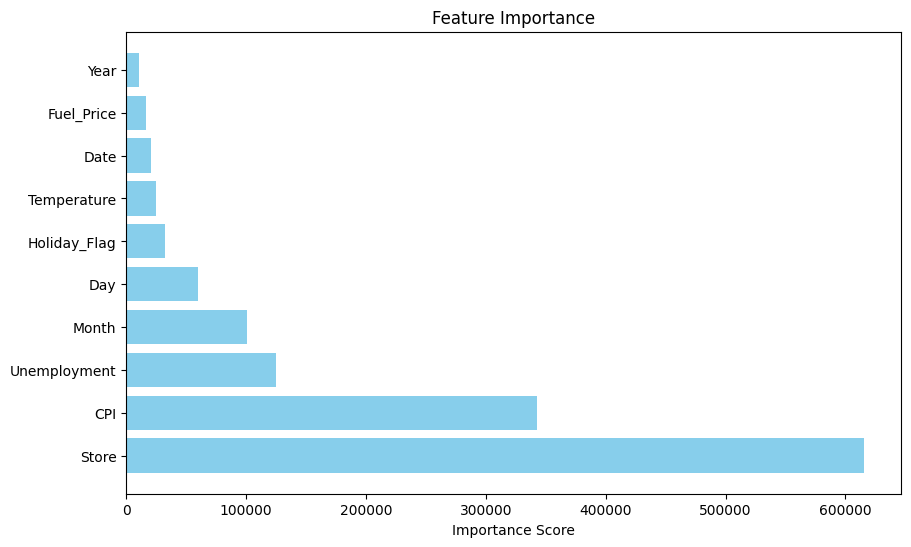

In [50]:
# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

Store is dominant factor
Economic Indicators Matter (Consumer Price Index)
Time-Based Patterns Exist
Holiday Impact is Noticeable
External Factors Play a Smaller Role

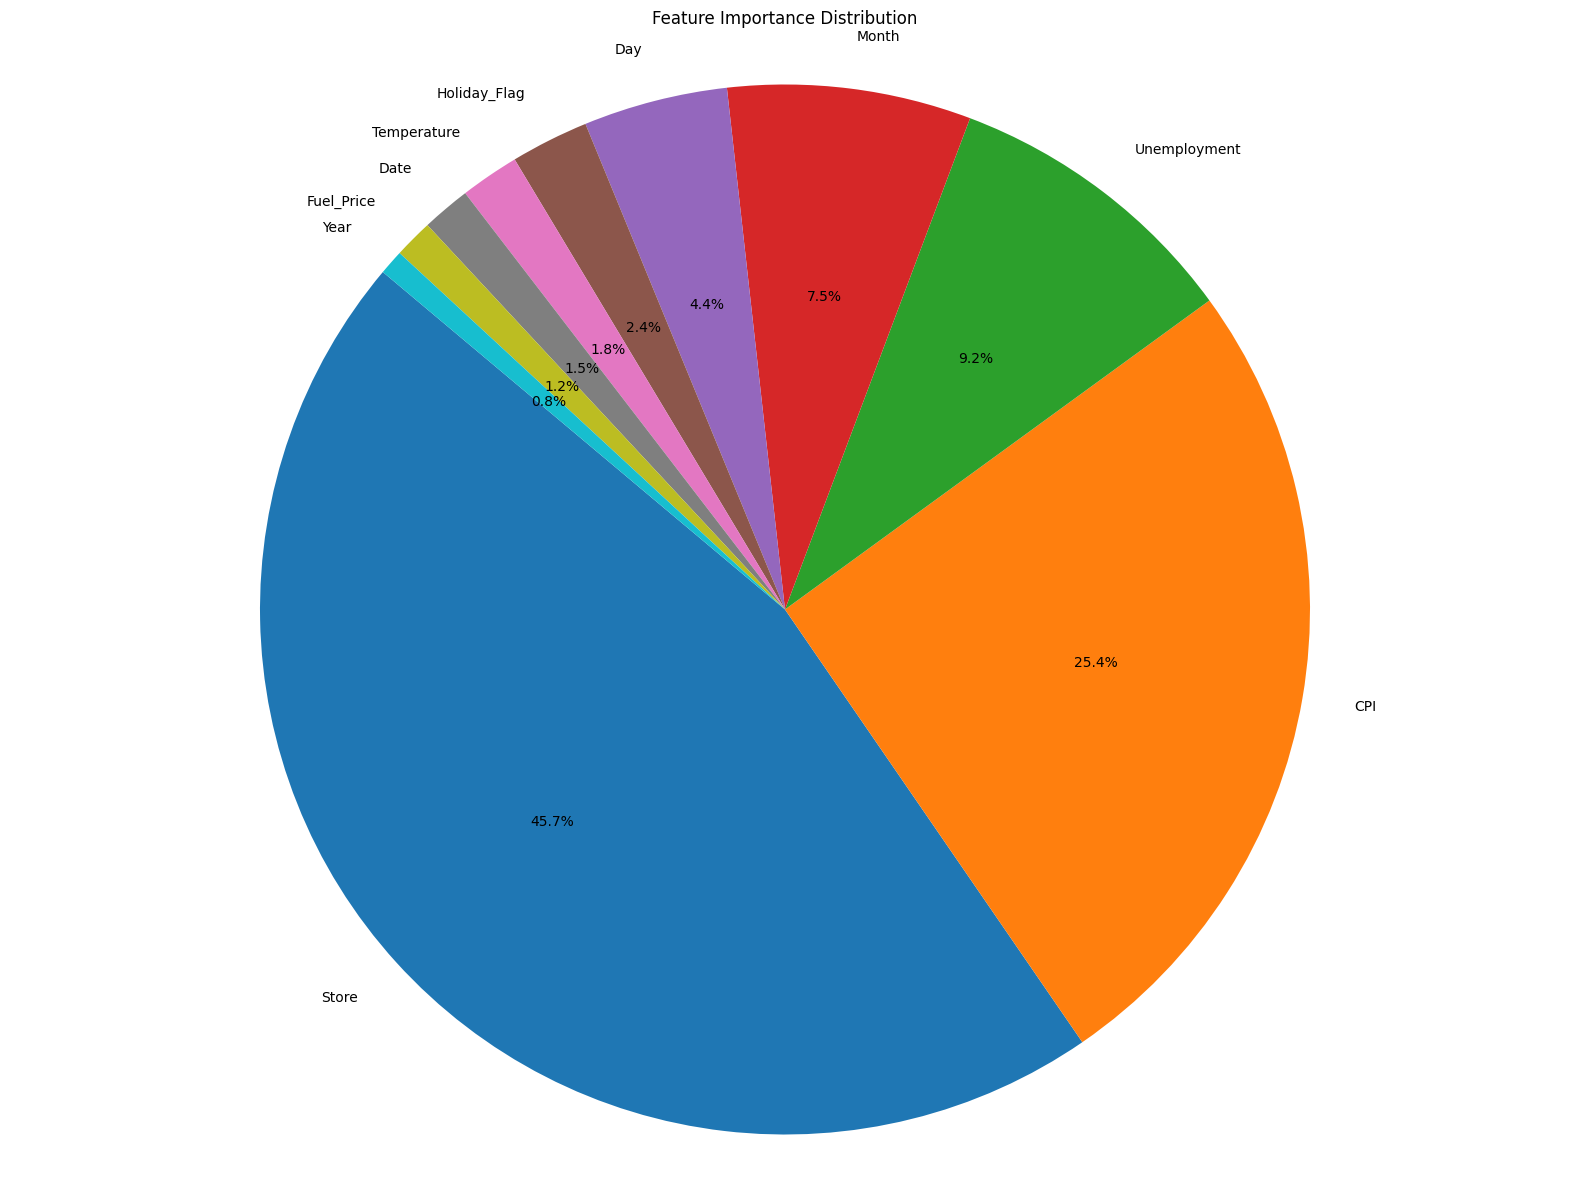

In [51]:
# Membuat diagram lingkaran
plt.figure(figsize=(20, 15))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', startangle=140)
plt.title('Feature Importance Distribution')
plt.axis('equal')  # Menjaga agar lingkaran tetap bulat
plt.show()